Import Libraries

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np

Read Dataset

In [2]:
df = pd.read_csv("house-prices-dataset/train.csv")

Get column details

In [3]:
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

Get DataFrame information - we got 81 columns, 1460 entries

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Get null values details in different formats

In [5]:
print("Column-wise null value count")
print(df.isnull().sum())

print("Null value count in mentioned column - LotFrontage null value count: ")
print(df['LotFrontage'].isnull().sum())

print("List of columns with null values")
cols_with_missing_values = df.columns[df.isnull().any()].tolist()
print(cols_with_missing_values)

print("Column-wise null value count without truncating in terminal")
print(df.isnull().sum().to_string())

Column-wise null value count
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64
Null value count in mentioned column - LotFrontage null value count: 
259
List of columns with null values
['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']
Column-wise null value count without truncating in terminal
Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
C

Basic Count Bar Chart, height indicating the count (or proportion) of missing values.Column count is high therefore only show columns with missing values

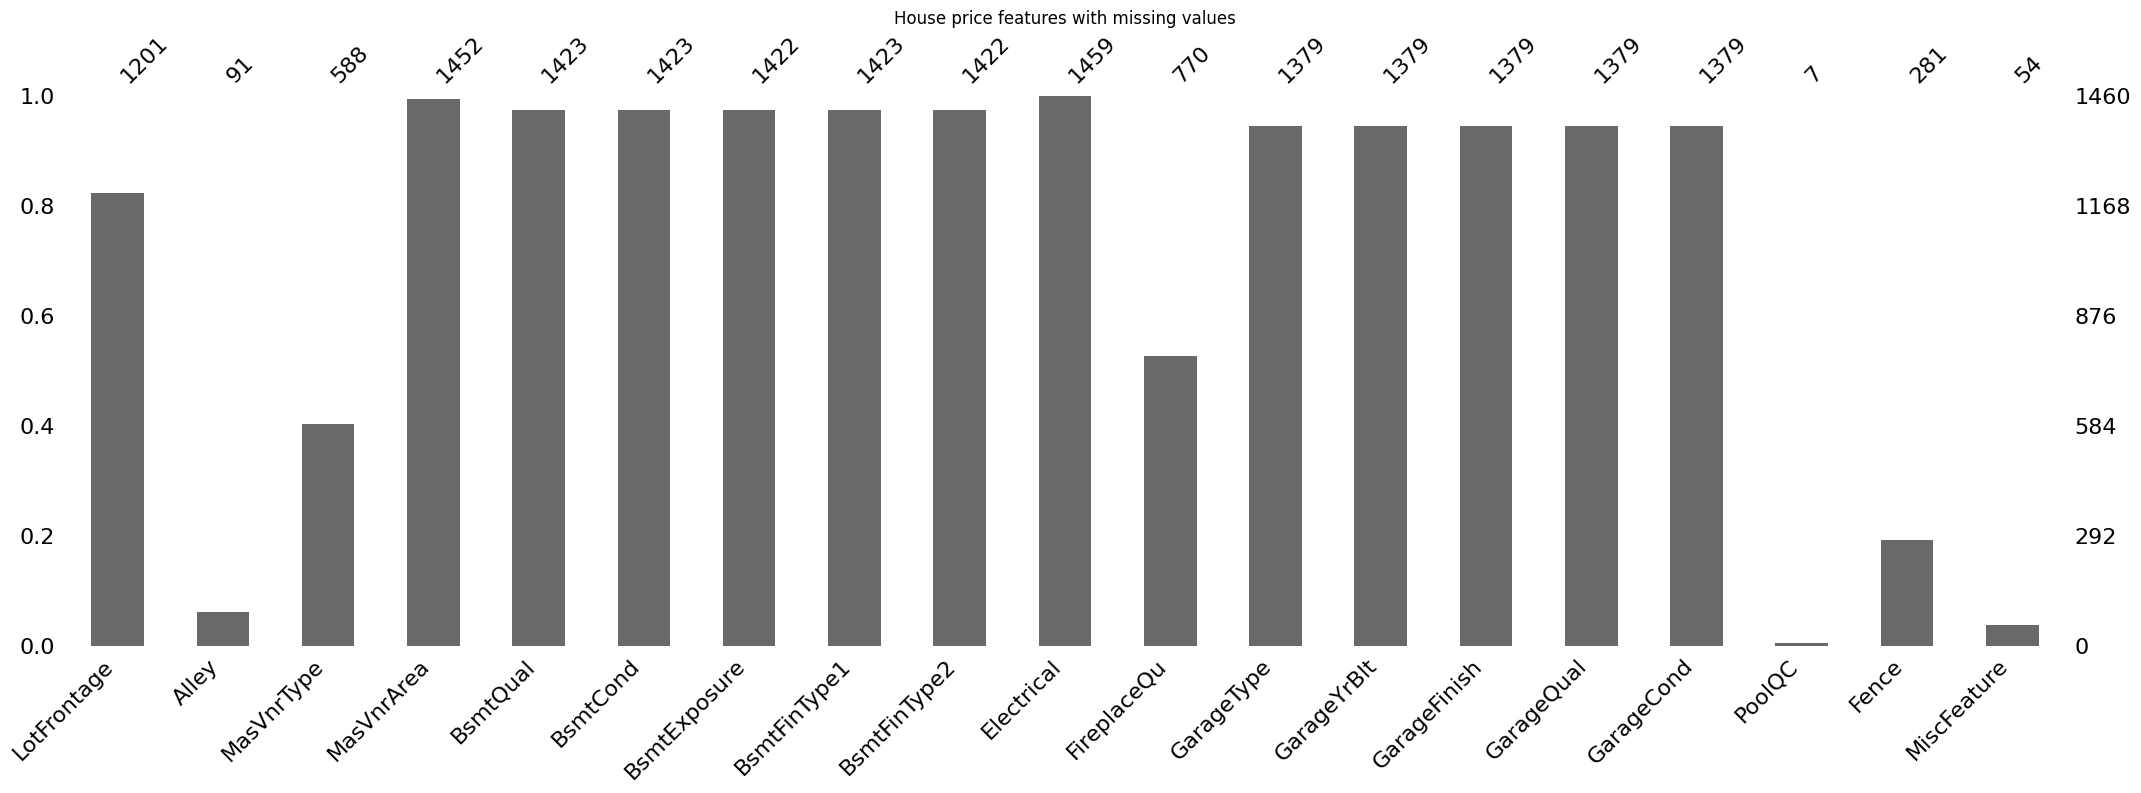

In [6]:
plt.tight_layout()
plt.title("House price features with missing values")

df_to_plot = df[['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']]
msno.bar(df_to_plot)

#Adjust the subplot layout

plt.subplots_adjust(
    left=0.1,  # the left side of the subplots of the figure
    right=0.9,  # the right side
    bottom=0.25,  # the bottom
    top=0.8,  # the top
    wspace=0.4,  # the amount of width reserved for space between subplots
    hspace=0.6  # the amount of height reserved for space between subplots
)
plt.show()

Analysis at this stage:

1. Out of 81, 19 Columns have null values
2. 4+1 Columns should be dropped as their null count is near to total entries = Alley, PoolQC, Fence, MiscFeature, MiscVal
3. 3 are numerical - LotFrontage(mean), MasVnrArea(median), GarageYrBlt(mean)
4. Rest are categorial - MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Electrical, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond

Copy the original Dataframe

In [7]:
df_modified = df.copy()

Remove Columns, for dropna convert empty and null string to null first. Here we are completely removing the columns

In [8]:
df_modified = df_modified.replace(['', 'NaN', ' ', 'NULL'], np.nan)
df_modified.drop(columns=['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'MiscVal'], inplace=True)

Compute Numerical Columns with typecasting if needed

In [9]:
mean_lf = df['LotFrontage'].mean()
median_mva = int(df['MasVnrArea'].median())
mean_gyb = int(df['GarageYrBlt'].mean())

df_modified.fillna({'LotFrontage': mean_lf}, inplace=True)
df_modified.fillna({'GarageYrBlt': mean_gyb}, inplace=True)
df_modified['MasVnrArea'] = df['MasVnrArea'].fillna(median_mva) # another format

df_modified['GarageYrBlt'] = df_modified['GarageYrBlt'].astype(int) # It was float64 in original dataset. Computation leads to decimal 0.

Categorial columns for mode imputation

In [10]:
cols_to_impute = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']

# Impute the missing values with the mode of each column
for col in cols_to_impute:
    mode_value =  df_modified[col].mode()[0]
    df_modified.fillna({col: mode_value}, inplace=True)

Save the dataset as file

In [11]:
df_modified.to_csv("house-prices-dataset/clean_dataset.csv", index=False)
# Save the new one, overrides if already exists.

Few information about new dataset

In [12]:
print(df_modified.info())
print(df_modified.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil